In [1]:
import pandas as pd

In [3]:
songs = pd.read_csv('../data/songs_normalize.csv')
songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [6]:
target = songs.popularity
feature = songs.drop(['popularity','song'], axis=1)

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [11]:
drop_song = songs.drop('song', axis=1)

---
### one hot encoding

In [14]:
drop_song.head()

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [18]:
drop_song.year.value_counts()

2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
1999     38
2020      3
1998      1
Name: year, dtype: int64

In [15]:
drop_song.artist.value_counts()

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

In [16]:
drop_song.genre.value_counts()

pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip hop, p

In [13]:
pd.get_dummies(drop_song, columns=['artist', 'genre'])

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,"genre_rock, blues","genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set()
0,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,...,0,0,0,0,0,0,0,0,0,0
1,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,...,0,0,0,0,0,1,0,0,0,0
2,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,...,0,0,0,0,0,0,0,0,0,0
3,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,...,0,0,0,0,1,0,0,0,0,0
4,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,...,0,0,0,0,0,0,0,0,0,0
1996,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,...,0,0,0,0,0,0,0,0,0,0
1997,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,...,0,0,0,0,0,0,0,0,0,0
1998,171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

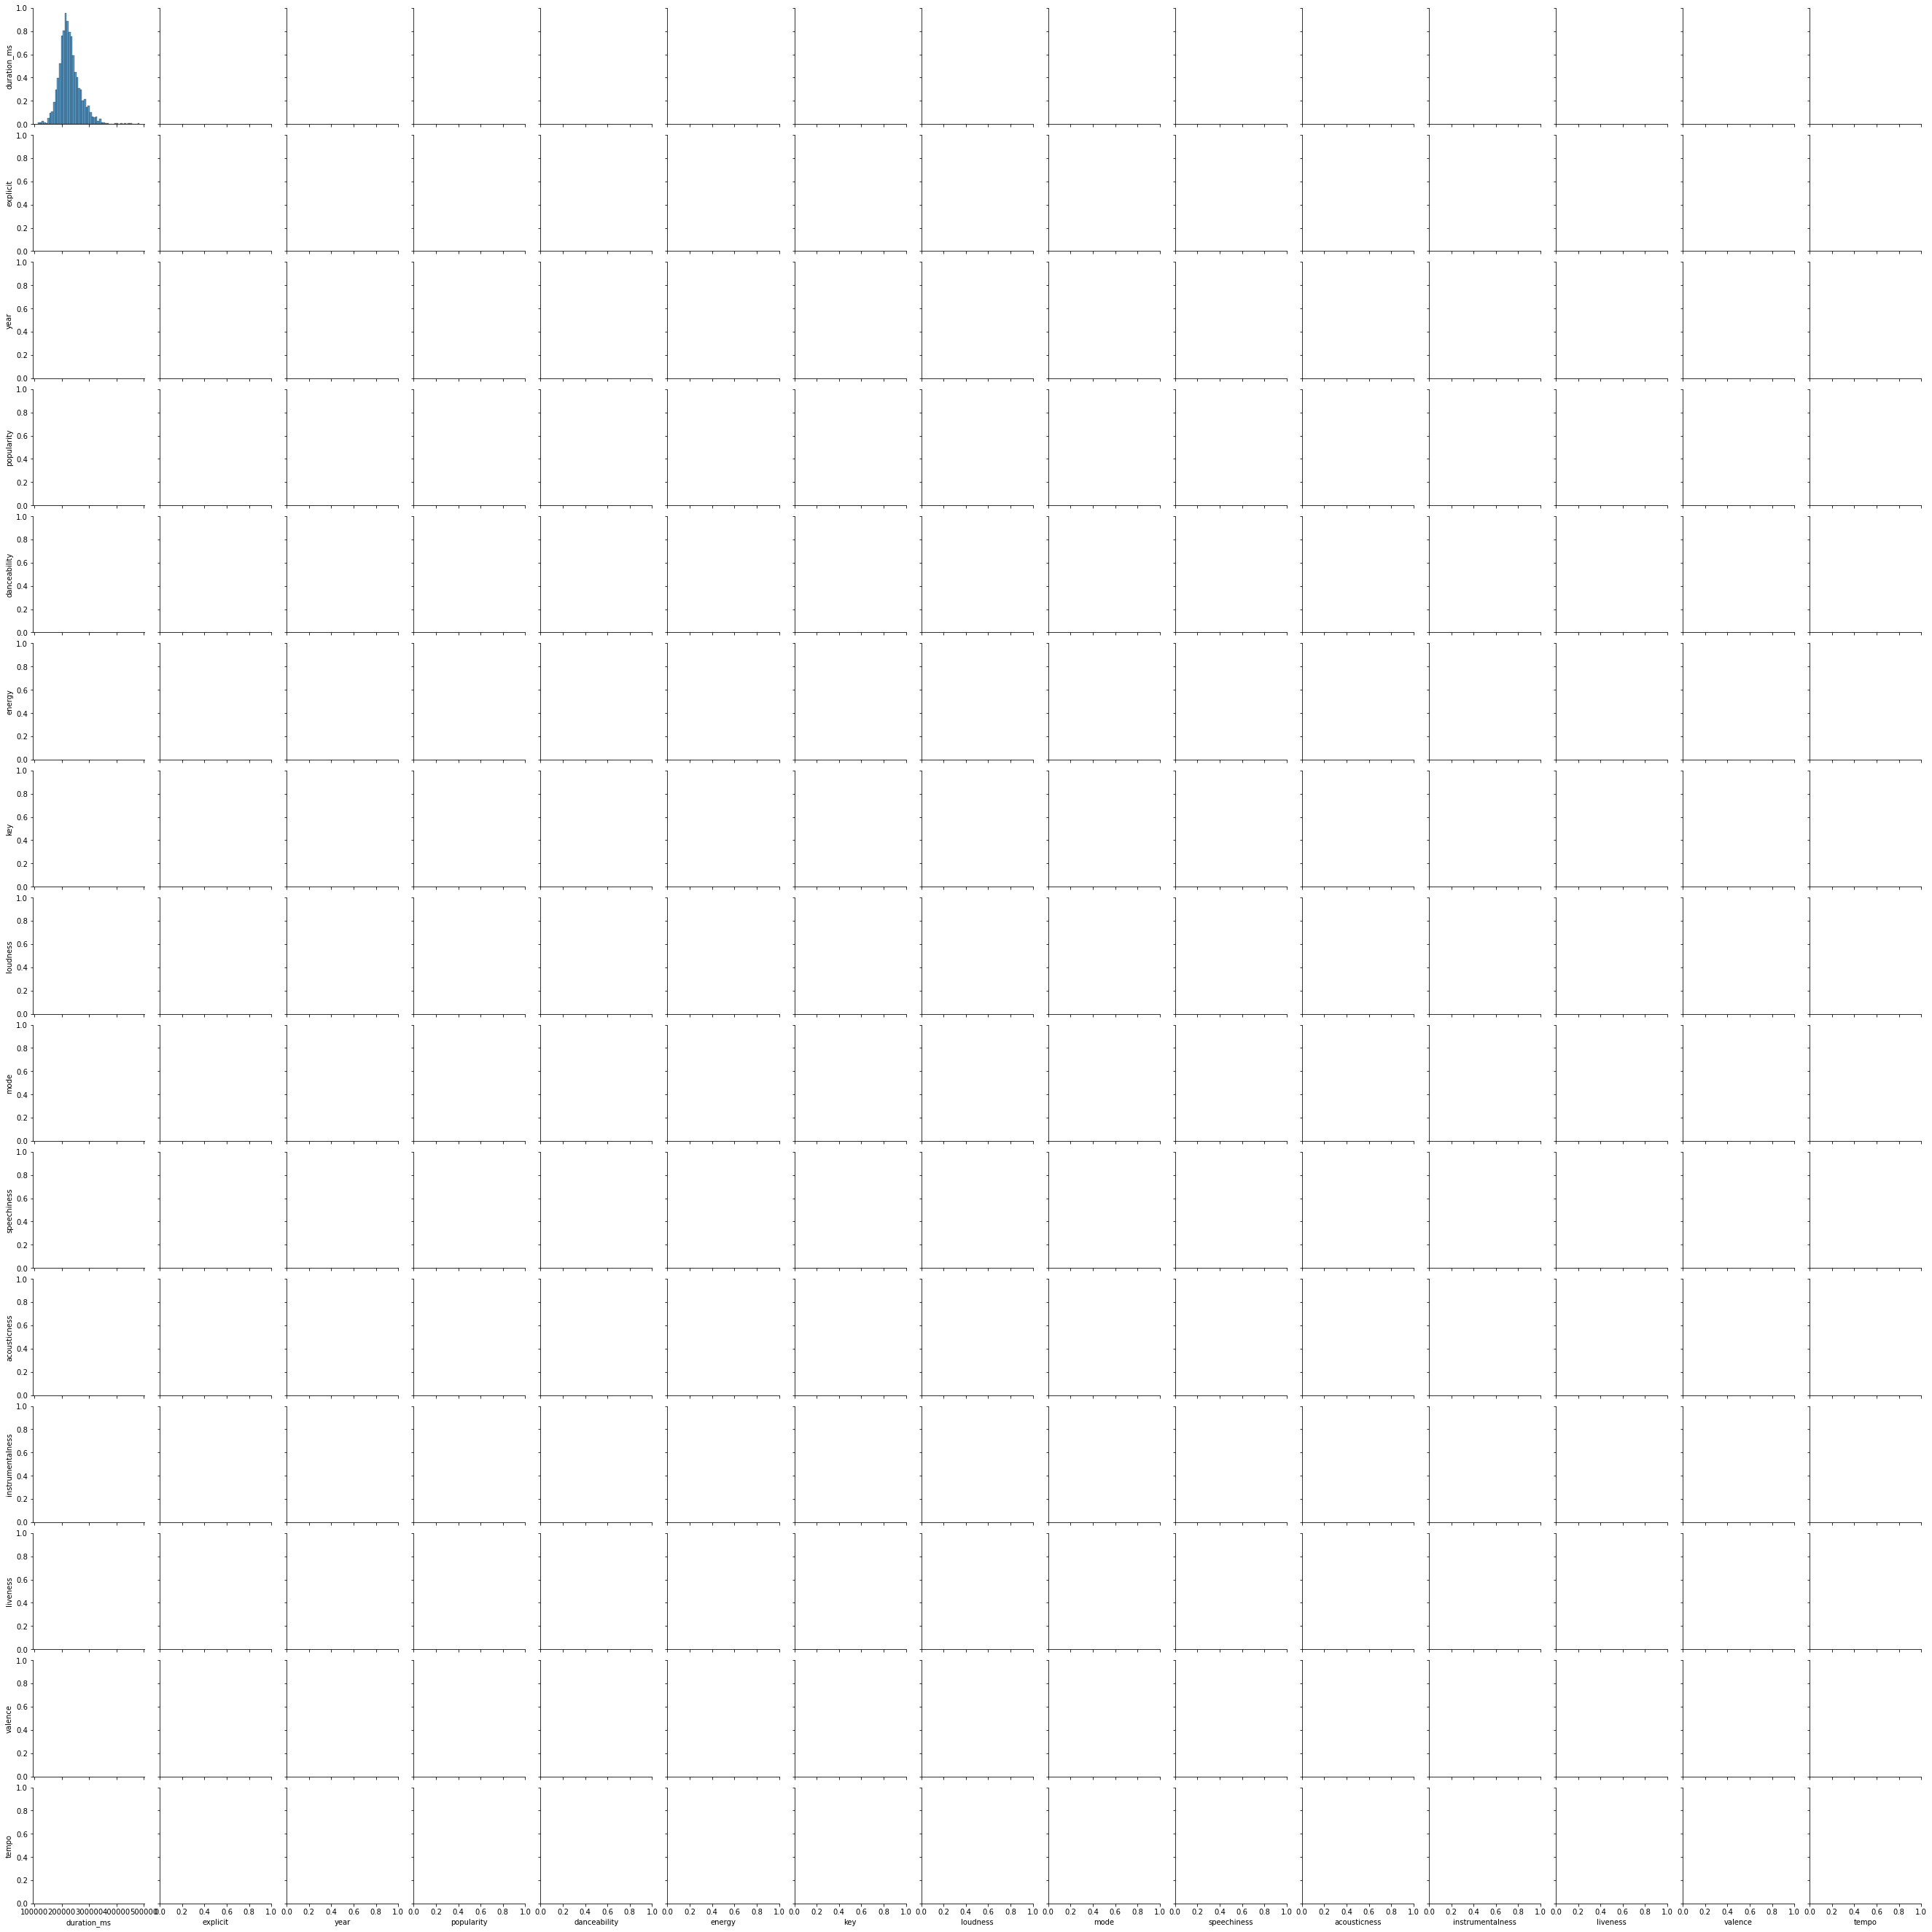

In [7]:
sns.pairplot(songs.drop('song', axis=1))